In [1]:
%matplotlib inline
# Load libraries
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
trainfile = "train.csv"
train_data = pandas.read_csv(trainfile, header=0)

In [3]:
print(train_data.shape)

(891, 12)


In [4]:
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
print(train_data.head(20))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.

In [6]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [7]:
print(train_data.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


In [8]:
# Convert Data to integer value
# female = 0, Male = 1
train_data["Sex"][train_data["Sex"] == "male"] = 0
train_data["Sex"][train_data["Sex"] == "female"] = 1

/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
# All missing Embarked -> just make them embark from most common place (S)
train_data["Embarked"] = train_data["Embarked"].fillna("S")

train_data["Embarked"][train_data["Embarked"] == "S"] = 0
train_data["Embarked"][train_data["Embarked"] == "C"] = 1
train_data["Embarked"][train_data["Embarked"] == "Q"] = 2

/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
# All the ages with no data -> make the median of all Ages
median_age = train_data['Age'].dropna().median()
if len(train_data.Age[ train_data.Age.isnull() ]) > 0:
    train_data.loc[ (train_data.Age.isnull()), 'Age'] = median_age

In [11]:
print(train_data.dtypes)
print(train_data.head(20))
print(train_data.describe())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18     

In [12]:
# Remove unused column
train_data = train_data.drop(['Name','Ticket', 'Cabin'], axis=1) 

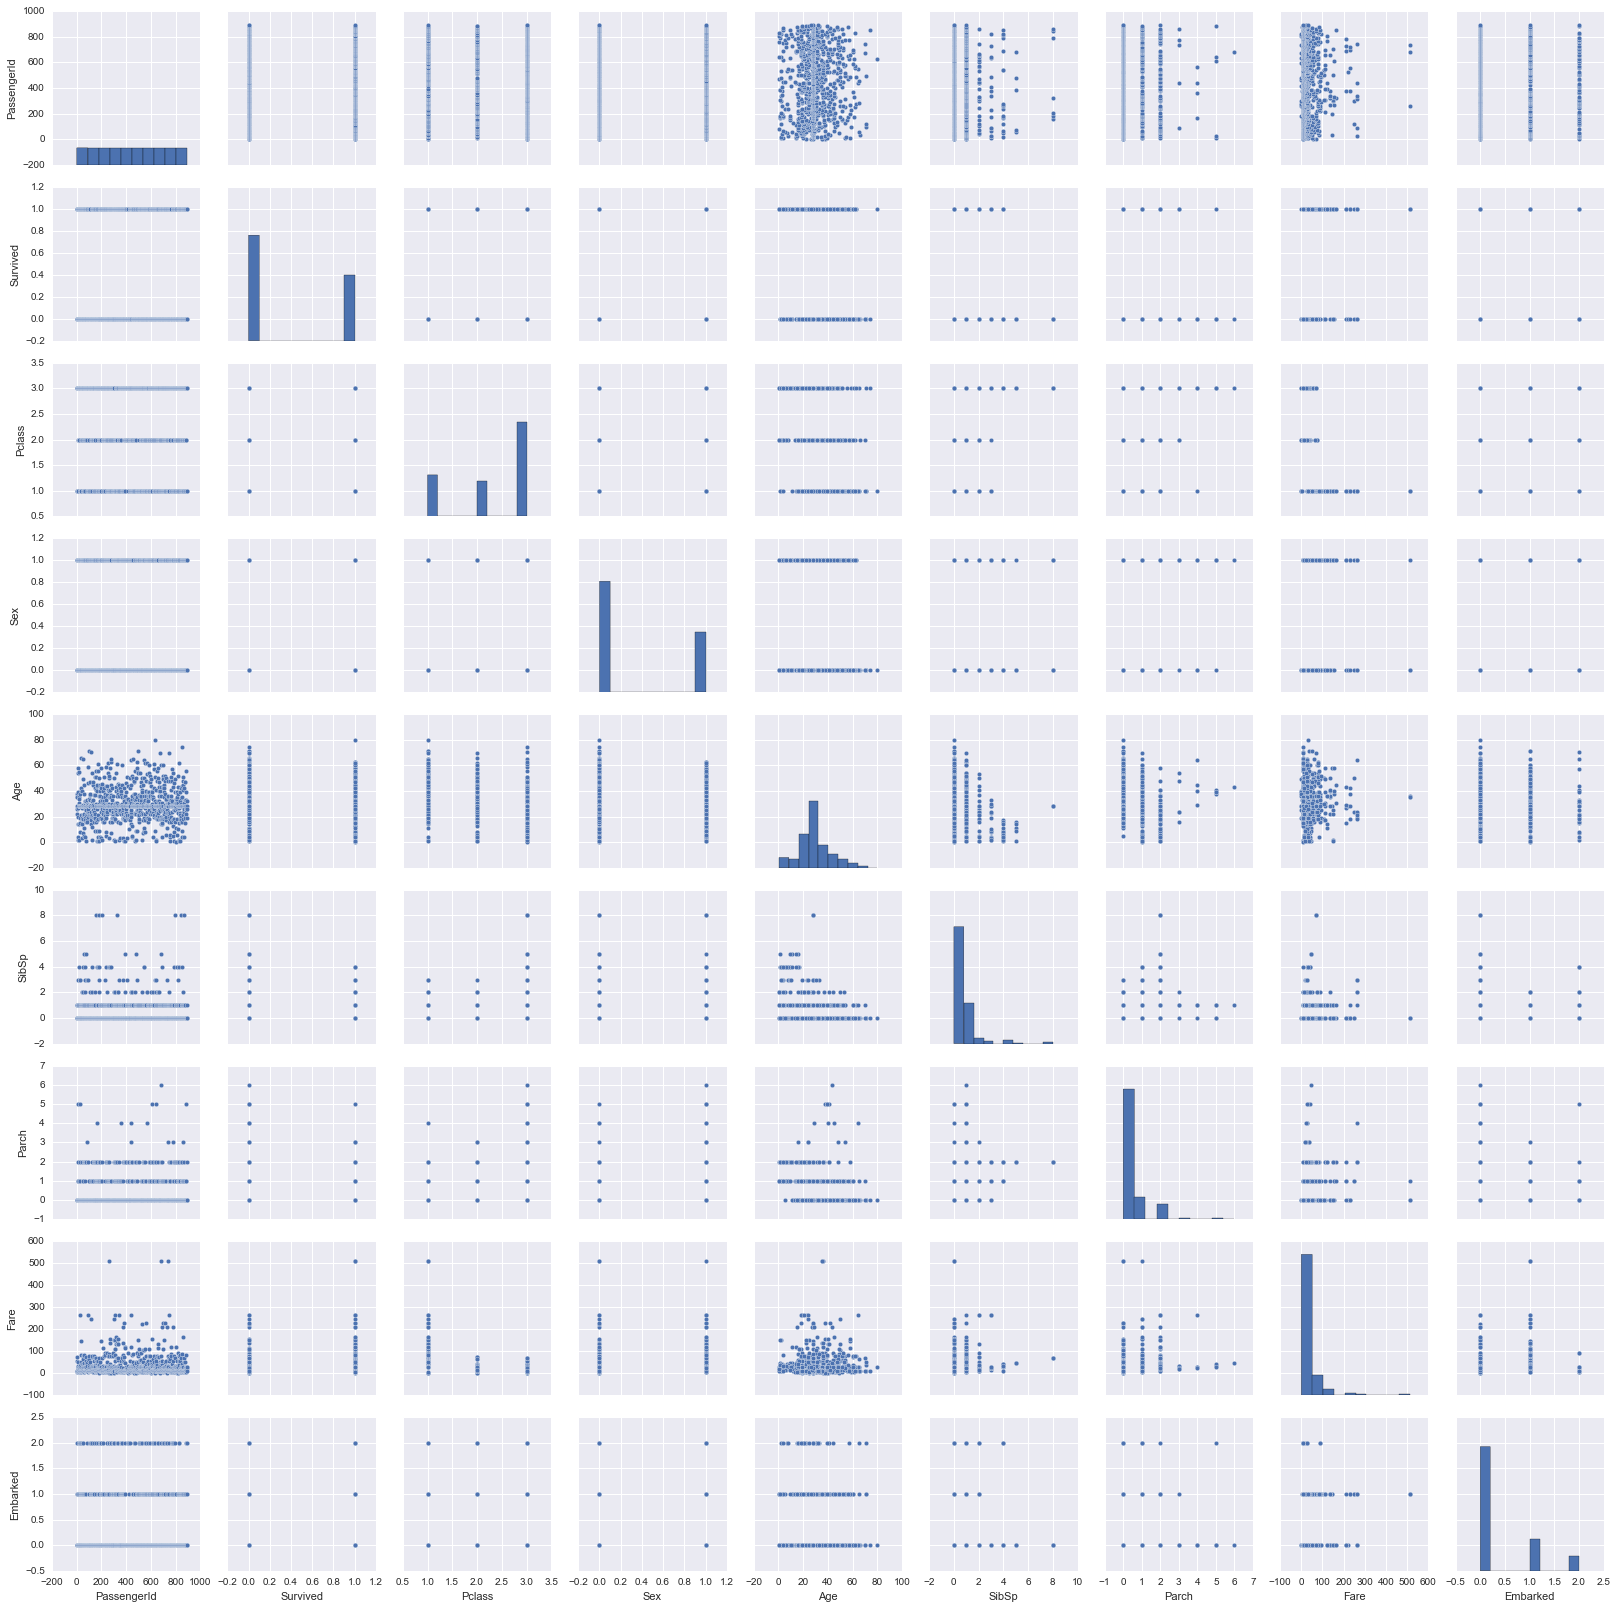

In [13]:
seaborn.pairplot(train_data)
plt.show()

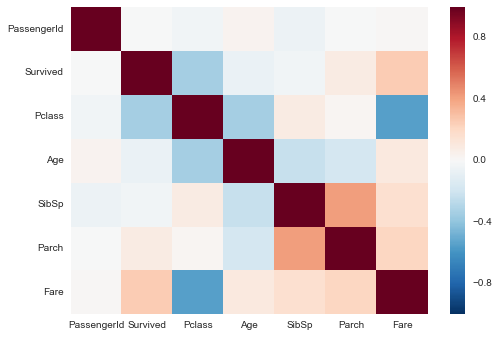

In [14]:
seaborn.heatmap(train_data.corr())
plt.show()

In [15]:
# TEST DATA
test_data = pandas.read_csv('test.csv', header=0)        # Load the test file into a dataframe

# female = 0, Male = 1
test_data["Sex"][test_data["Sex"] == "male"] = 0
test_data["Sex"][test_data["Sex"] == "female"] = 1

# Embarked from 'C', 'Q', 'S'
# All missing Embarked -> just make them embark from most common place
test_data["Embarked"] = train_data["Embarked"].fillna("S")

test_data["Embarked"][train_data["Embarked"] == "S"] = 0
test_data["Embarked"][train_data["Embarked"] == "C"] = 1
test_data["Embarked"][train_data["Embarked"] == "Q"] = 2


# All the ages with no data -> make the median of all Ages
median_age = test_data['Age'].dropna().median()
if len(test_data.Age[ test_data.Age.isnull() ]) > 0:
    test_data.loc[ (test_data.Age.isnull()), 'Age'] = median_age

# All the missing Fares -> assume median of their respective class
if len(test_data.Fare[ test_data.Fare.isnull() ]) > 0:
    median_fare = numpy.zeros(3)
    for f in range(0,3):                                              # loop 0 to 2
        median_fare[f] = test_data[ test_data.Pclass == f+1 ]['Fare'].dropna().median()
    for f in range(0,3):                                              # loop 0 to 2
        test_data.loc[ (test_data.Fare.isnull()) & (test_data.Pclass == f+1 ), 'Fare'] = median_fare[f]

/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yohaneswidisono/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyW

In [16]:
print(test_data.dtypes)
print(test_data.head(20))
print(test_data.describe())

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object
    PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3        

In [17]:
# Remove unused column
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1) 

In [18]:
print(train_data.shape)
print(test_data.shape)

(891, 9)
(418, 8)


In [19]:
# Split-out validation dataset
array = train_data.values
print(array.shape)
X = train_data.drop("Survived",axis=1).values.astype(float)
print(X)
Y = train_data["Survived"].values
print(Y)

(891, 9)
[[   1.        3.        0.     ...,    0.        7.25      0.    ]
 [   2.        1.        1.     ...,    0.       71.2833    1.    ]
 [   3.        3.        1.     ...,    0.        7.925     0.    ]
 ..., 
 [ 889.        3.        1.     ...,    2.       23.45      0.    ]
 [ 890.        1.        0.     ...,    0.       30.        1.    ]
 [ 891.        3.        0.     ...,    0.        7.75      2.    ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1

In [20]:
validation_size = 0.33
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
    test_size=validation_size, random_state=seed)
print(X_train)
print(Y_train)
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring =  'accuracy'
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))

results = []
names = []
for name, model in models:
  kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

[[  66.        3.        0.     ...,    1.       15.2458    1.    ]
 [ 446.        1.        0.     ...,    2.       81.8583    0.    ]
 [ 660.        1.        0.     ...,    2.      113.275     1.    ]
 ..., 
 [ 538.        1.        1.     ...,    0.      106.425     1.    ]
 [ 197.        3.        0.     ...,    0.        7.75      2.    ]
 [ 176.        3.        0.     ...,    1.        7.8542    0.    ]]
[1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1
 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 

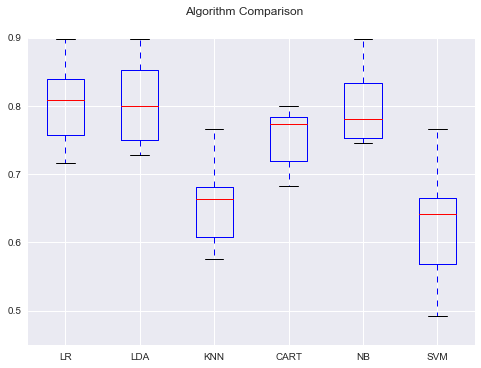

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))
pipelines.append(( 'ScaledLDA' , Pipeline([( 'Scaler' , StandardScaler()),( 'LDA' ,
    LinearDiscriminantAnalysis())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.796977 (0.062082)
ScaledLDA: 0.803729 (0.058228)
ScaledKNN: 0.832119 (0.042260)
ScaledCART: 0.780226 (0.052850)
ScaledNB: 0.798616 (0.050089)
ScaledSVM: 0.843814 (0.058109)


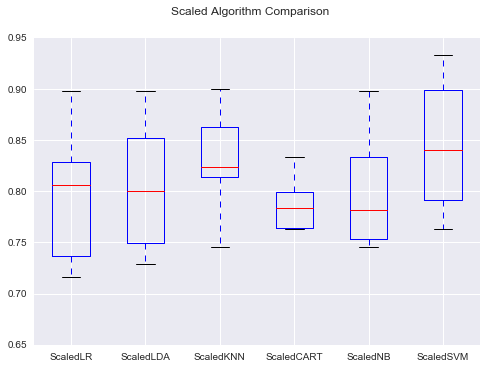

In [23]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:
# ensembles
ensembles = []
ensembles.append(( 'AB' , AdaBoostClassifier()))
ensembles.append(( 'GBM' , GradientBoostingClassifier()))
ensembles.append(( 'RF' , RandomForestClassifier()))
ensembles.append(( 'ET' , ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.812090 (0.056898)
GBM: 0.835424 (0.057087)
RF: 0.821949 (0.046656)
ET: 0.832062 (0.054193)


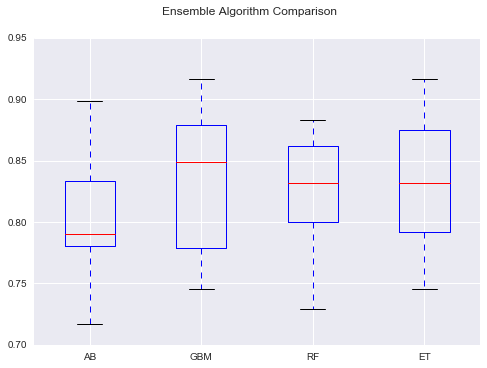

In [25]:
# Compare Algorithms
# print(results)
fig = plt.figure()
fig.suptitle( 'Ensemble Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.850671 using {'kernel': 'rbf', 'C': 0.5}
0.802006 (0.051539) with: {'kernel': 'linear', 'C': 0.1}
0.780028 (0.064063) with: {'kernel': 'poly', 'C': 0.1}
0.820424 (0.052156) with: {'kernel': 'rbf', 'C': 0.1}
0.625734 (0.070942) with: {'kernel': 'sigmoid', 'C': 0.1}
0.803672 (0.050630) with: {'kernel': 'linear', 'C': 0.3}
0.793418 (0.056102) with: {'kernel': 'poly', 'C': 0.3}
0.835480 (0.058362) with: {'kernel': 'rbf', 'C': 0.3}
0.625734 (0.070942) with: {'kernel': 'sigmoid', 'C': 0.3}
0.802006 (0.049895) with: {'kernel': 'linear', 'C': 0.5}
0.816864 (0.061154) with: {'kernel': 'poly', 'C': 0.5}
0.850565 (0.049875) with: {'kernel': 'rbf', 'C': 0.5}
0.625734 (0.070942) with: {'kernel': 'sigmoid', 'C': 0.5}
0.802006 (0.049895) with: {'kernel': 'linear', 'C': 0.7}
0.820282 (0.064436) with: {'kernel': 'poly', 'C': 0.7}
0.845480 (0.049644) with: {'kernel': 'rbf', 'C': 0.7}
0.625734 (0.070942) with: {'kernel': 'sigmoid', 'C': 0.7}
0.802006 (0.049895) with: {'kernel': 'linear', 'C': 0.9

In [27]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.832215 using {'n_neighbors': 7}
0.781893 (0.032568) with: {'n_neighbors': 1}
0.820198 (0.059124) with: {'n_neighbors': 3}
0.827062 (0.041081) with: {'n_neighbors': 5}
0.832062 (0.049288) with: {'n_neighbors': 7}
0.832062 (0.056899) with: {'n_neighbors': 9}
0.832006 (0.069958) with: {'n_neighbors': 11}
0.823559 (0.069733) with: {'n_neighbors': 13}
0.820254 (0.065367) with: {'n_neighbors': 15}
0.823701 (0.058368) with: {'n_neighbors': 17}
0.815282 (0.058766) with: {'n_neighbors': 19}
0.815311 (0.059173) with: {'n_neighbors': 21}


In [31]:
#neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = {'n_estimators':range(20,81,10)}
model = GradientBoostingClassifier()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.848993 using {'n_estimators': 50}
0.838842 (0.059660) with: {'n_estimators': 20}
0.838785 (0.062595) with: {'n_estimators': 30}
0.842203 (0.055679) with: {'n_estimators': 40}
0.848870 (0.056687) with: {'n_estimators': 50}
0.842119 (0.061269) with: {'n_estimators': 60}
0.835395 (0.056775) with: {'n_estimators': 70}
0.835424 (0.059935) with: {'n_estimators': 80}


In [32]:
param_grid = {'max_depth':range(3,16,2), 'min_samples_split':range(100,1001,200)}
model = GradientBoostingClassifier()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.835570 using {'min_samples_split': 300, 'max_depth': 9}
0.822090 (0.059053) with: {'min_samples_split': 100, 'max_depth': 3}
0.832062 (0.057352) with: {'min_samples_split': 300, 'max_depth': 3}
0.833785 (0.053772) with: {'min_samples_split': 500, 'max_depth': 3}
0.625734 (0.070942) with: {'min_samples_split': 700, 'max_depth': 3}
0.625734 (0.070942) with: {'min_samples_split': 900, 'max_depth': 3}
0.825452 (0.040978) with: {'min_samples_split': 100, 'max_depth': 5}
0.832062 (0.055329) with: {'min_samples_split': 300, 'max_depth': 5}
0.833785 (0.053772) with: {'min_samples_split': 500, 'max_depth': 5}
0.625734 (0.070942) with: {'min_samples_split': 700, 'max_depth': 5}
0.625734 (0.070942) with: {'min_samples_split': 900, 'max_depth': 5}
0.825480 (0.045912) with: {'min_samples_split': 100, 'max_depth': 7}
0.830367 (0.059488) with: {'min_samples_split': 300, 'max_depth': 7}
0.833785 (0.053772) with: {'min_samples_split': 500, 'max_depth': 7}
0.625734 (0.070942) with: {'min_samples

In [33]:
param_grid = {'min_samples_split':range(200,1001,100), 'min_samples_leaf':range(10,71,10)}
model = GradientBoostingClassifier()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.840604 using {'min_samples_split': 400, 'min_samples_leaf': 20}
0.832147 (0.059397) with: {'min_samples_split': 200, 'min_samples_leaf': 10}
0.830508 (0.047410) with: {'min_samples_split': 300, 'min_samples_leaf': 10}
0.832175 (0.043423) with: {'min_samples_split': 400, 'min_samples_leaf': 10}
0.828785 (0.051213) with: {'min_samples_split': 500, 'min_samples_leaf': 10}
0.625734 (0.070942) with: {'min_samples_split': 600, 'min_samples_leaf': 10}
0.625734 (0.070942) with: {'min_samples_split': 700, 'min_samples_leaf': 10}
0.625734 (0.070942) with: {'min_samples_split': 800, 'min_samples_leaf': 10}
0.625734 (0.070942) with: {'min_samples_split': 900, 'min_samples_leaf': 10}
0.625734 (0.070942) with: {'min_samples_split': 1000, 'min_samples_leaf': 10}
0.832203 (0.060089) with: {'min_samples_split': 200, 'min_samples_leaf': 20}
0.835424 (0.063654) with: {'min_samples_split': 300, 'min_samples_leaf': 20}
0.840508 (0.047536) with: {'min_samples_split': 400, 'min_samples_leaf': 20}
0.8

In [34]:
param_grid = {'n_estimators':range(20,81,10)}
model = ExtraTreesClassifier()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.838926 using {'n_estimators': 60}
0.833672 (0.048707) with: {'n_estimators': 20}
0.830367 (0.047814) with: {'n_estimators': 30}
0.837175 (0.044845) with: {'n_estimators': 40}
0.837119 (0.039636) with: {'n_estimators': 50}
0.838870 (0.042829) with: {'n_estimators': 60}
0.833814 (0.036011) with: {'n_estimators': 70}
0.837090 (0.043827) with: {'n_estimators': 80}


In [39]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(kernel= 'rbf', C= 0.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("Accuracy Score")
print(accuracy_score(Y_validation, predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_validation, predictions))
print("classification_report")
print(classification_report(Y_validation, predictions))

Accuracy Score
0.779661016949
Confusion Matrix
[[153  23]
 [ 42  77]]
classification_report
             precision    recall  f1-score   support

          0       0.78      0.87      0.82       176
          1       0.77      0.65      0.70       119

avg / total       0.78      0.78      0.78       295



In [40]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier( n_estimators= 50)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("Accuracy Score")
print(accuracy_score(Y_validation, predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_validation, predictions))
print("classification_report")
print(classification_report(Y_validation, predictions))

Accuracy Score
0.789830508475
Confusion Matrix
[[158  18]
 [ 44  75]]
classification_report
             precision    recall  f1-score   support

          0       0.78      0.90      0.84       176
          1       0.81      0.63      0.71       119

avg / total       0.79      0.79      0.78       295



In [41]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier( n_estimators= 60)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("Accuracy Score")
print(accuracy_score(Y_validation, predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_validation, predictions))
print("classification_report")
print(classification_report(Y_validation, predictions))

Accuracy Score
0.789830508475
Confusion Matrix
[[153  23]
 [ 39  80]]
classification_report
             precision    recall  f1-score   support

          0       0.80      0.87      0.83       176
          1       0.78      0.67      0.72       119

avg / total       0.79      0.79      0.79       295



In [48]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier( n_estimators= 50)
model.fit(rescaledX, Y_train)

X_test = test_data.values.astype(float)
rescaledValidationXTest = scaler.transform(X_test)

predictions = model.predict(rescaledValidationXTest)

model.score(rescaledX, Y_train)

0.88087248322147649

In [52]:
submission = pandas.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": predictions
    })

print (submission.shape)
print (submission.head(20))

submission.to_csv('titanic.csv', index=False)

(418, 2)
    PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         0
4           896         0
5           897         0
6           898         1
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         0
19          911         1
